# Chapter 15: Exercises

In [1]:
library(tidyverse)
library(bayesrules)
library(bayesplot)
library(broom.mixed)
library(rstanarm)
library(tidybayes)
library(ggmosaic)
library(e1071)
library(lme4)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
This is bayesplot version 1.10.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting

Loading required package: Rcpp

This is rstanarm version 2.21.4

- See https://mc-stan.org/rstanarm/articles/priors for changes to default priors!

- Default priors may change, so it's safest to specify priors, even if equ

## Exercise 15.3

Draw the graph yourself: Population in the top level, flowing down to individual subject (middle level) and each individual subject brings its own measures for reaction times on 10 days on the lowest level.

## Exercise 15.4

### a)

In [2]:
head( sleepstudy, 10 )

,Reaction,Days,Subject
,<dbl>,<dbl>,<fct>
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
6,414.6901,5,308
7,382.2038,6,308
8,290.1486,7,308
9,430.5853,8,308


`geom_smooth()` using formula = 'y ~ x'


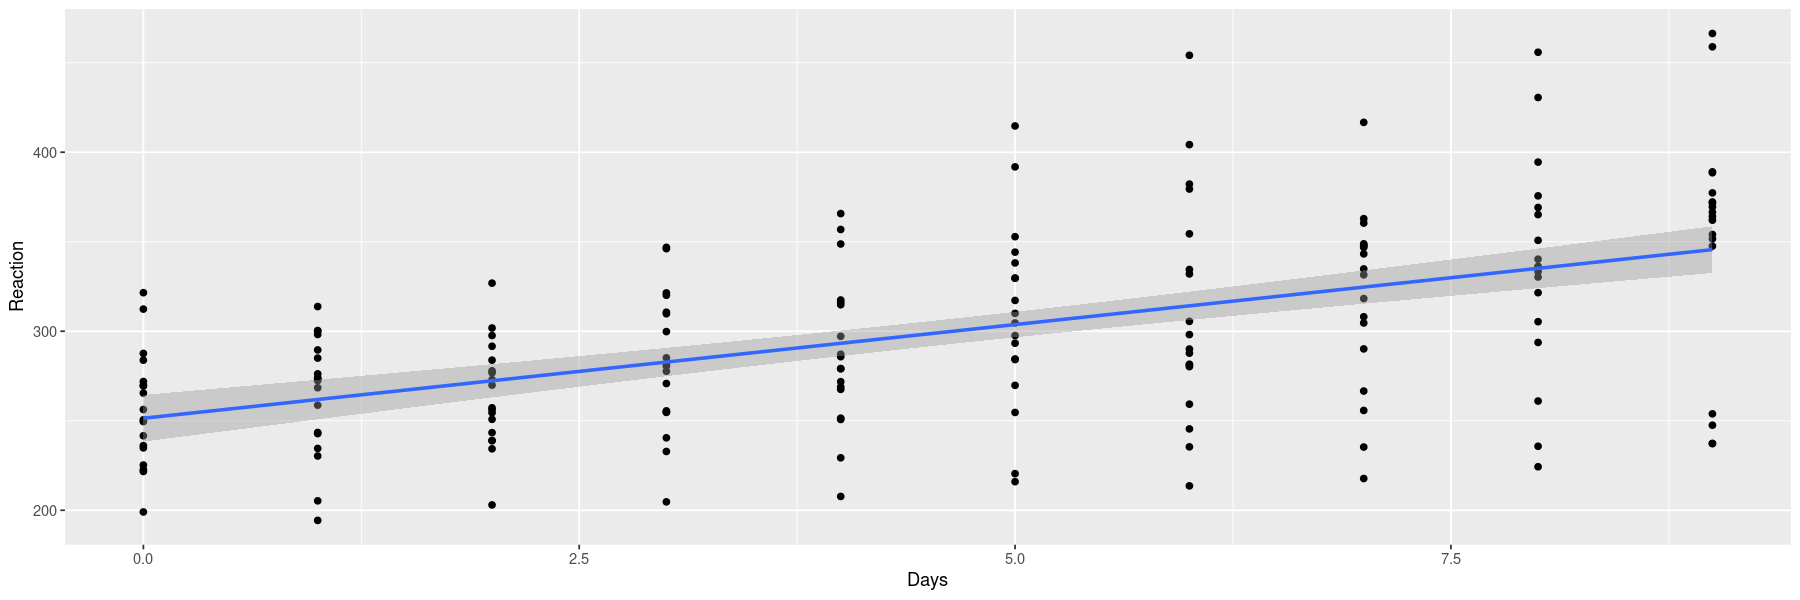

In [3]:
options(repr.plot.width=15, repr.plot.height=5)
ggplot( sleepstudy, aes(x=Days, y=Reaction) ) + geom_point() + geom_smooth( method="lm" )

The reaction time increases with sleep deprivation (as expected).

### b)

Draw graph yourself: Population top node goes directly to reaction time measurements on individual days, subject information is ignored.

### c)

$$Y_i \sim N(\mu_i, \sigma^2), \quad \mu_i = \beta_0 + \beta_1 X_i$$

$$\beta_0 \sim N(\theta_0, \tau_0^2)$$

$$\beta_1 \sim N(0, \tau_1^2)$$

## Exercise 15.5

Assumptions: 1) Reaction times are not independent, however assumed to be so, 2) Subject information is treated as irrelevant, however it is highly relevant. Different people react differently to sleep deprivation, therefore the reaction times are not independent. 

## Exercise 15.6

`geom_smooth()` using formula = 'y ~ x'


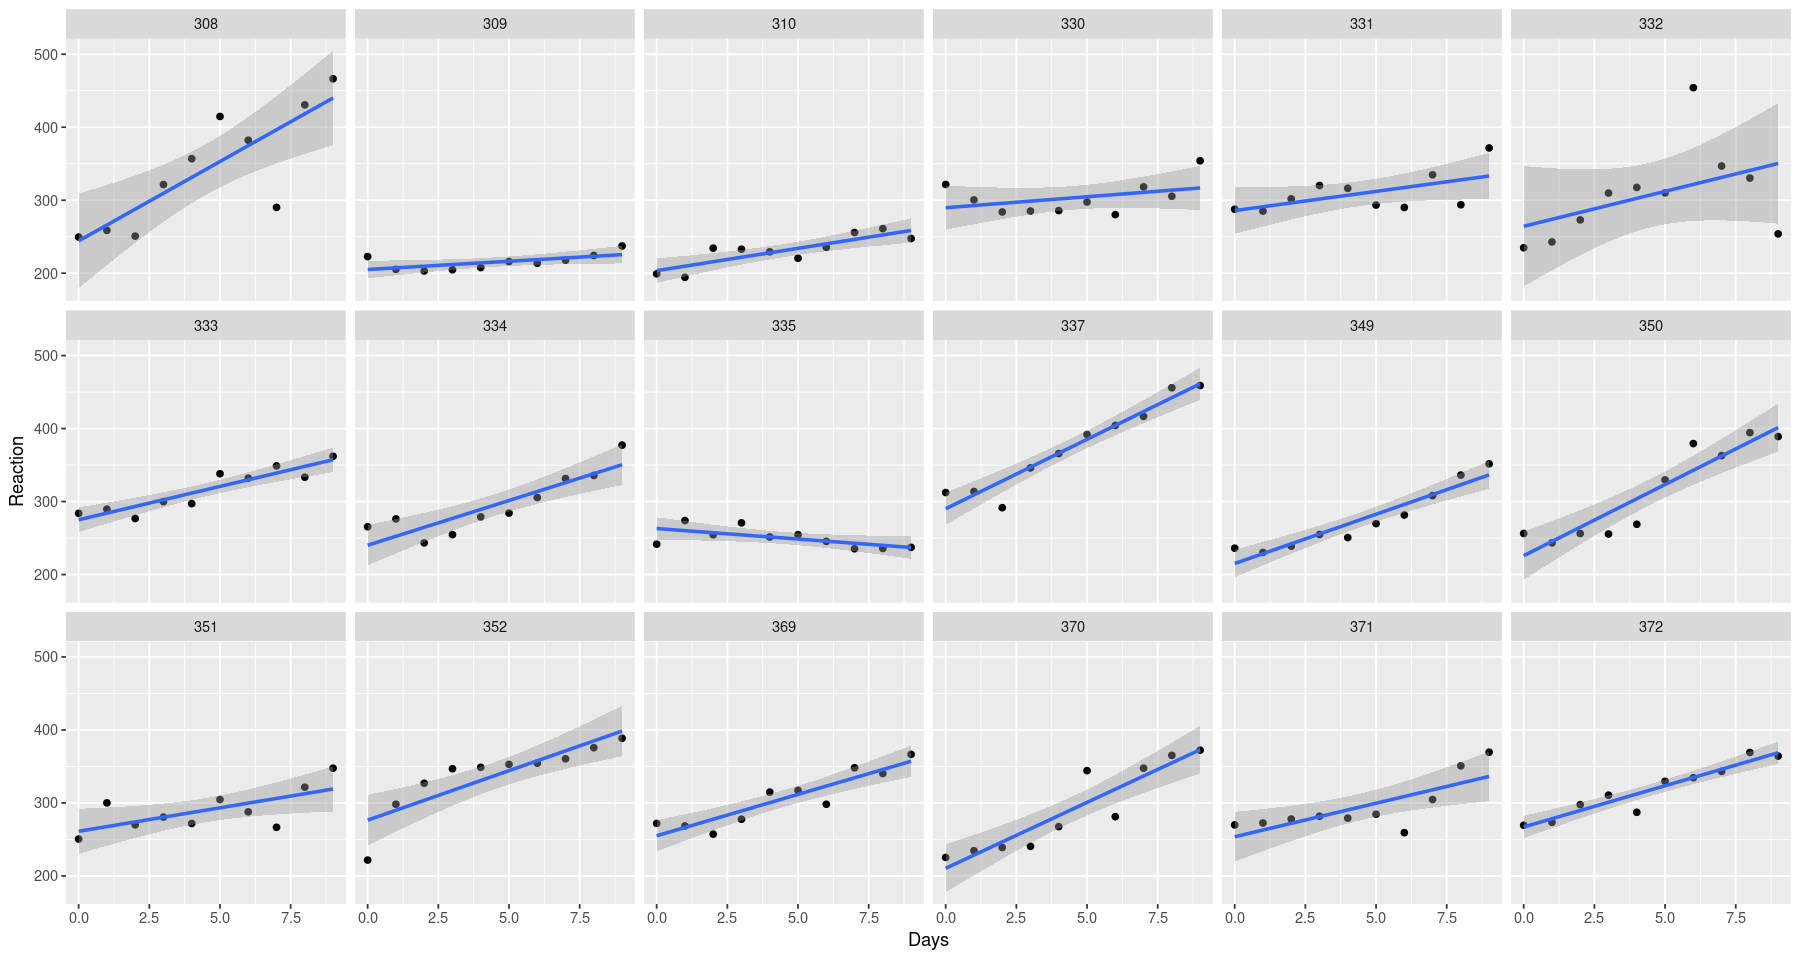

In [4]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot( sleepstudy, aes(x=Days, y=Reaction) ) + 
    geom_point() + geom_smooth(method="lm") + facet_wrap(~Subject, ncol=6)

A general trend of increasing reaction time over the days is visible, however it varies considerably among the different subjects.

### b)

Draw yourself: One series of reaction time measurements (lowest level) for each subject (top level). No connection to overall population.

### c)

$$Y_{i,k} \sim N(\mu_{i,k}, \sigma_k^2), \quad \mu_{i,k} = \beta_{0,k} + \beta_{1,k} X_{i,k}$$

$$\beta_{0,k} \sim N(\theta_{0,k}, \tau_{0,k}^2)$$

$$\beta_{1,k} \sim N(0, \tau_{1,k}^2)$$

For reaction times on day $i=0,..,9$ for subject $k$.

## Exercise 15.7

Drawbacks: 1) Cannot model any new subject entering the study, 2) Every model has to learn the overall trend of increasing reaction times again.

## Exercise 15.8

Something similar to this:

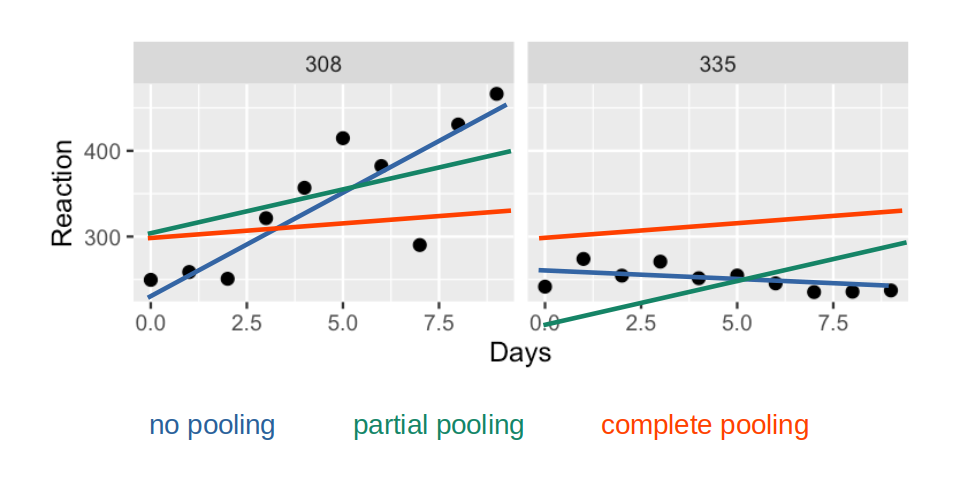